In [51]:
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [52]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0])

if module_path not in sys.path:
    sys.path.append(module_path)

In [53]:
from dictionary.tag_category import tag_category

In [54]:
df = pd.read_csv('../data/6.data_for_model.csv',index_col='title')

In [55]:
df.pop('totalLike')

title
ผัดวุ้นเส้นกระเพราหมูกรอบ     0
ไข่ตุ๋นมาม่า                  5
เกี่ยมอี๋คั่วไส้หมูก้อน       6
ออรินจิคั่วเกลือพริกไทย       4
กระหล่ำปลีทอดน้ำปลา           3
                             ..
สุกี้น้ำกระดูกอ่อน            8
ผัดผักรวมมิตร                 1
ผัดมาม่าต้มยำ                 2
สปาเก็ตตี้ขี้เมาเห็ด          6
เบอร์เกอร์หมูชุ่มฉ่ำ         10
Name: totalLike, Length: 2787, dtype: int64

In [56]:
title = df.index

In [57]:
len(df[df['น้ำปลา'] > 0 ])

773

In [58]:
remove_tag = sum([tag_category[t] for t in tag_category if t not in ['วัตถุดิบ','ประเภทอาหาร','วิธีการ','อาหารเพื่อสุขภาพ']],[])

In [59]:
for x in df:
  if x in remove_tag:
      df.drop(x,axis=1)

In [60]:
arr = []

for x in df:
  arr.append(len(df[df[x] > 0]))

In [61]:
q1, q3 = np.quantile(arr,[0.25,0.75])

In [62]:
for x in df:
  if len(df[df[x] > 0]) <= q1 or len(df[df[x] > 0]) >= q3:
    df.drop(x,axis=1)

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [64]:
standardized_data.to_csv('../data/data_for_model_2.csv',index=False)

In [65]:
df = standardized_data
df.head()

,bacon-recipes,salted-egg-recipes,high-fiber-recipes,1-3-year-baby-recipes,fusion-food-recipes,thai-food-recipes,3-7-year-kid-recipes,clean-food-recipes,steak-recipes,thai-noodle-recipes,...,เพนเน่,ดอกโสน,ซูกินี่,ยีสต์,ผักขม,ถั่วแขก,ลูกกระวาน,น้ำอาจาด,ข้าวมัน,มันบด
0,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.039112,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946
1,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.039112,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946
2,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.039112,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946
3,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.039112,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946
4,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.039112,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946


In [66]:
# n_components = len(df.columns)
# explained_variance = []

# for n in tqdm(range(1, n_components+1)):
#     pca = PCA(n_components=n)
#     pca.fit(df)
#     explained_variance.append(sum(pca.explained_variance_ratio_))

In [67]:
# plt.plot(range(1, n_components+1), explained_variance, '-o')
# plt.xlabel('Number of principal components')
# plt.ylabel('Explained variance ratio')
# plt.xlim(1,10)
# plt.show()

In [68]:
best_n = 4

In [69]:
pca = PCA(n_components=best_n)
principal_components = pca.fit_transform(df)

In [70]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC$'])

In [71]:
# principal_df.insert(0,'title',df.index)

In [72]:
principal_df

,PC1,PC2,PC3,PC$
0,0.126357,-1.057462,1.961625,1.279620
1,-0.885266,-0.417466,0.132557,0.198478
2,-0.451465,-0.447303,0.115193,0.245592
3,-0.326929,-0.455188,0.487686,-0.033228
4,-0.592358,-0.908370,-0.272557,0.222803
...,...,...,...,...
2782,0.771906,-1.001165,-0.897312,-0.128236
2783,-0.878842,1.368809,-0.279361,0.952821
2784,-0.677742,-0.646479,0.232939,0.190108
2785,0.896199,-1.758566,2.133300,-2.685463


In [73]:
linkage_matrix = linkage(df, 'ward')

In [74]:
# dendrogram(linkage_matrix)
# plt.ylim(0,10000)
# plt.show()

In [75]:
num_clusters = 100

In [76]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [77]:
clusters.shape

(2787,)

In [78]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=clusters)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# plt.show()

In [79]:
food_clusters = [[] for _ in range(num_clusters)]

In [80]:
for i,x in enumerate(clusters):
  print(i,x)
  food_clusters[x-1].append(title[i])

0 80
1 80
2 80
3 80
4 80
5 80
6 80
7 17
8 27
9 80
10 80
11 80
12 80
13 83
14 80
15 61
16 31
17 17
18 80
19 80
20 80
21 80
22 80
23 80
24 80
25 80
26 80
27 80
28 80
29 64
30 80
31 83
32 80
33 57
34 83
35 51
36 80
37 27
38 80
39 80
40 80
41 80
42 80
43 80
44 80
45 80
46 75
47 80
48 80
49 80
50 80
51 71
52 57
53 80
54 80
55 31
56 80
57 51
58 80
59 61
60 80
61 80
62 59
63 80
64 31
65 51
66 80
67 80
68 72
69 80
70 80
71 75
72 80
73 64
74 80
75 80
76 80
77 75
78 80
79 80
80 80
81 80
82 72
83 80
84 57
85 80
86 80
87 80
88 80
89 80
90 80
91 53
92 80
93 80
94 8
95 31
96 31
97 80
98 80
99 80
100 80
101 80
102 31
103 51
104 80
105 75
106 75
107 72
108 13
109 80
110 80
111 75
112 64
113 80
114 27
115 15
116 80
117 53
118 61
119 80
120 80
121 31
122 80
123 96
124 80
125 66
126 80
127 51
128 80
129 80
130 80
131 80
132 80
133 80
134 80
135 80
136 80
137 80
138 75
139 80
140 80
141 80
142 80
143 51
144 80
145 51
146 61
147 80
148 80
149 80
150 80
151 75
152 80
153 80
154 80
155 80
156 80
157 57
158 8

In [81]:
[len(x) for x in food_clusters][80:100]

[1, 6, 16, 1, 2, 2, 4, 1, 2, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1]

In [82]:
food_clusters[26]

['หมูแดดเดียว',
 'Tonkatsu',
 'สเต๊กอกไก่สไปซี่มัสตาร์ดและสลัดแตงกวา',
 'เสต็กเนื้อเกลือพริกไทย',
 'หมูผัดผงกะหรี่',
 'สเต๊กพอร์คชอป',
 'ข้าวราดแกงกะหรี่หมูทอดทงคัตสึ',
 'เซอร์ลอยน์จิ้มแจ่ว',
 'ข้าวราดหมูทอดแกงกะหรี่',
 'แฮมเบิร์กชีส',
 'ปลาทอดมะเขือ',
 'ซี่โครงอบBBQ',
 'ไก่เเซ่บ',
 'สเต็กเนื้อและเฟรนฟราย',
 'สเต็กแซลมอนพริกไทยดำ',
 'พิซซ่า',
 'สันคอหมูแดงย่าง',
 'ไก่ทอดคลุกลาบ',
 'เคบับไก่',
 'สเต็กหมูสันคอพริกไทยดำ',
 'ทงคัตสึ',
 'สเต๊กอกไก่พริกไทยดำ',
 'เฟตตูชินีมีทบอล',
 'กุ้งผัดผงกะหรี่',
 'ข้าวไก่กรอบซอสเขียวหวาน',
 'เบอร์เกอร์ข้าวหมู',
 'คัตสึด้ง',
 'ขนมปังบริยอช',
 'สปาเก็ตตี้ครีมกุ้ง',
 'ไก่ทอดกรอบๆ',
 'สเต๊กทูน่า',
 'หมูผัดพริกไทยดำ',
 'สเต็กปลาจาระเม็ด']

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from kneed import KneeLocator
from yellowbrick.cluster.elbow import kelbow_visualizer

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

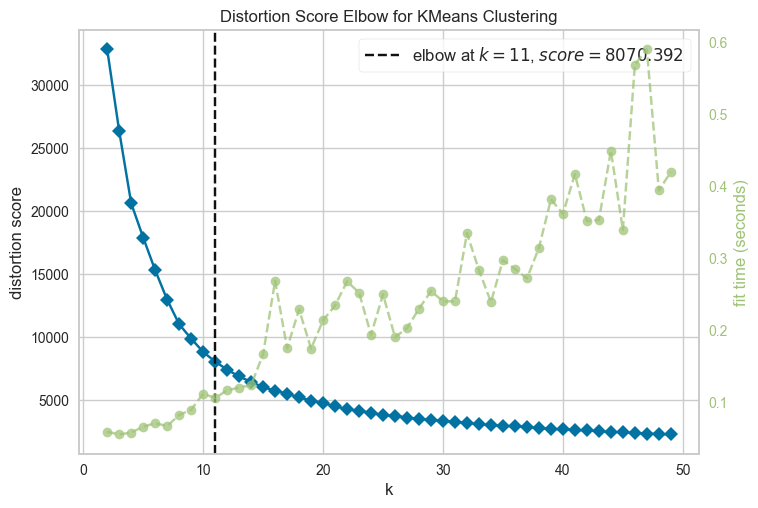

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=49), k=(2, 50))

In [84]:
kelbow_visualizer(KMeans(), principal_df, k=(2,50))


In [85]:
scaler = StandardScaler()

array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)

In [86]:
df_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,...,381,382,383,384,385,386,387,388,389,390
count,2.787000e+03,2.787000e+03,2787.000000,2.787000e+03,2.787000e+03,2.787000e+03,2.787000e+03,2.787000e+03,2.787000e+03,2.787000e+03,...,2.787000e+03,2.787000e+03,2.787000e+03,2.787000e+03,2787.0,2.787000e+03,2.787000e+03,2.787000e+03,2.787000e+03,2.787000e+03
mean,1.657168e-17,1.912117e-18,0.000000,-1.529694e-17,7.648469e-18,3.314336e-17,2.549490e-18,4.716556e-17,7.648469e-18,-1.529694e-17,...,2.549490e-18,1.274745e-18,5.098979e-18,2.549490e-18,0.0,1.147270e-17,-1.274745e-18,-5.098979e-18,-2.549490e-18,-5.098979e-18
std,1.000179e+00,1.000179e+00,1.000179,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,...,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,0.0,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00
min,-9.890707e-02,-6.575959e-02,-0.107774,-6.000840e-02,-1.730130e-01,-4.480798e-01,-8.713318e-02,-2.500477e-01,-8.285024e-02,-1.457848e-01,...,-3.911244e-02,-2.396714e-02,-3.193522e-02,-2.542190e-02,0.0,-2.627724e-02,-1.894565e-02,-1.894565e-02,-2.297691e-02,-1.894565e-02
25%,-9.890707e-02,-6.575959e-02,-0.107774,-6.000840e-02,-1.730130e-01,-4.480798e-01,-8.713318e-02,-2.500477e-01,-8.285024e-02,-1.457848e-01,...,-3.911244e-02,-2.396714e-02,-3.193522e-02,-2.542190e-02,0.0,-2.627724e-02,-1.894565e-02,-1.894565e-02,-2.297691e-02,-1.894565e-02
50%,-9.890707e-02,-6.575959e-02,-0.107774,-6.000840e-02,-1.730130e-01,-4.480798e-01,-8.713318e-02,-2.500477e-01,-8.285024e-02,-1.457848e-01,...,-3.911244e-02,-2.396714e-02,-3.193522e-02,-2.542190e-02,0.0,-2.627724e-02,-1.894565e-02,-1.894565e-02,-2.297691e-02,-1.894565e-02
75%,-9.890707e-02,-6.575959e-02,-0.107774,-6.000840e-02,-1.730130e-01,-4.480798e-01,-8.713318e-02,-2.500477e-01,-8.285024e-02,-1.457848e-01,...,-3.911244e-02,-2.396714e-02,-3.193522e-02,-2.542190e-02,0.0,-2.627724e-02,-1.894565e-02,-1.894565e-02,-2.297691e-02,-1.894565e-02
max,1.011050e+01,1.520691e+01,9.278672,1.666433e+01,5.779914e+00,2.231745e+00,1.147668e+01,3.999238e+00,1.206997e+01,6.859426e+00,...,4.063491e+01,5.007335e+01,3.462427e+01,4.720847e+01,0.0,4.879683e+01,5.278257e+01,5.278257e+01,5.120635e+01,5.278257e+01


/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'SSE')

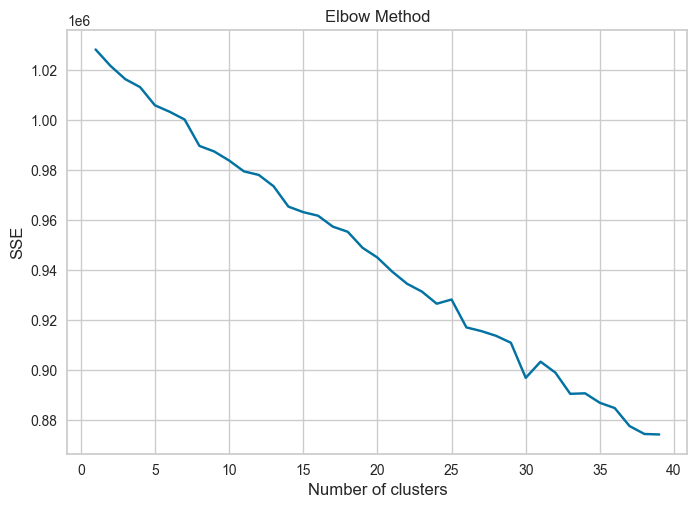

In [87]:
max_k = 40
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [88]:
from sklearn.metrics import silhouette_score

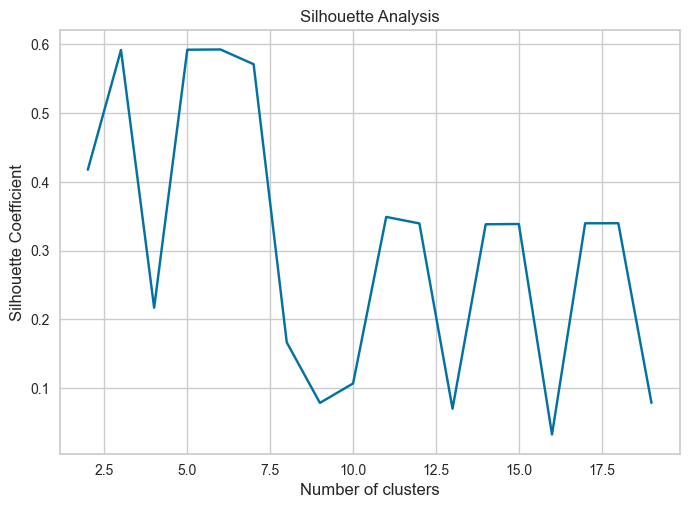

In [89]:
silhouette_scores = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Plot the Silhouette scores
plt.plot(range(2, 20), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()


In [90]:
# Choose value for k
k = 14
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,bacon-recipes,salted-egg-recipes,high-fiber-recipes,1-3-year-baby-recipes,fusion-food-recipes,thai-food-recipes,3-7-year-kid-recipes,clean-food-recipes,steak-recipes,thai-noodle-recipes,...,ดอกโสน,ซูกินี่,ยีสต์,ผักขม,ถั่วแขก,ลูกกระวาน,น้ำอาจาด,ข้าวมัน,มันบด,cluster_id
0,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946,2
1,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946,2
2,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946,2
3,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946,7
4,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946,7
2783,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946,7
2784,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946,7
2785,-0.098907,-0.06576,-0.107774,-0.060008,-0.173013,-0.44808,-0.087133,-0.250048,-0.08285,-0.145785,...,-0.023967,-0.031935,-0.025422,0.0,-0.026277,-0.018946,-0.018946,-0.022977,-0.018946,7


In [91]:
for x in range(k):
  print(len(df[df['cluster_id'] == x]))

3
118
2218
1
10
1
20
410
1
1
1
1
1
1
